In [ ]:
# here we would like do some phys-related calculation basiced on basic physical constant
#

In [1]:
import numpy as np
import pandas as pd
import sys 
import matplotlib.pyplot as plt
import scipy.constants as sc
import math
% matplotlib qt    
# or qt for popup windows

In [3]:
"""the value of the common constants"""
h=6.62606896*10**-34    # J*S   普朗克常量    planck constant   sc.Planck
kB=1.3806504*10**-23    # J/K   玻尔兹曼常量  Boltzmann         sc.Boltzmann
e=1.602176487*10**-19   # C     电荷单元
pi=np.pi                # Π 
# e=np.e                  # e     
me=9.10938215*10**-31   # kg    电子质量
mp=1.672621637*10**-27  # kg    质子质量
mn=1.674927211*10**-27  # kg    中子质量
c=299792458             # m/s   真空光速
NA=6.02214179*10**23    # 1/mol 阿伏伽德罗常数
uB=9.27400915*10**-24   # J/T 波尔磁子
a0=5.2917720859*10**-11 # m 波尔半径
F=9.64853399*10**4      # =NA*e C/mol 法拉第常数
c0=8.854187817*10**-12  # F/m真空介电常数
u0=1.2566370614*10**-6  # H/m 真空磁导率
k=9.0*10**9             # N·m^2/C^2, 静电力常量

In [10]:
'''fermi velocity calculation'''
u=2.56*1.6*10**-19     # chemical potential        
vf=(2*u/me)**0.5       # fermi velocity
print ('fermi velocity is ', vf, 'm/s')

fermi velocity is  954055.6704 m/s


In [23]:
'''mean free path calculation'''
tau=1*10**-12
L=tau*vf
print('mean free path is ', L/10**-9, 'nm')

mean free path is  954.0556704 nm


In [25]:
'''S/FM system coherence length in FM'''

T=2                    # K, temperature
ts=1*10**-11           # s, spin-flip scatter rate
L= 10**-9              # m, mean free path
D=L*vf/3               # m^2/s , disffusion constant
Eex=0.1                # eV, exchange energy = 1/2 * exchange splitting

llb=h*vf/(2*pi*2*pi*kB*T+h/(2*pi*ts))          # coherence length in ballistic limit for the long-range proximity effect
lld=(h*D/(2*pi*2*pi*kB*T+h/(2*pi*ts)))**0.5    # coherence length in diffusive limit for the long-range proximity effect
lsb=h*vf/(2*pi*Eex*e)                              # coherence length in ballistic limit for the Short-range proximity effect
lsd=(h*D/(2*pi*Eex*e))**0.5                     # coherence length in diffusive limit for the Short-range proximity effect

print( ' long-range, short-range PE in ballistic are ', llb/10**-9,'and',lsb/10**-9, 'nm') 

 long-range, short-range PE in ballistic are  574.347966628 and 6.27970805403 nm


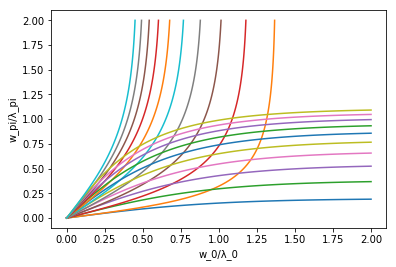

In [2]:
""" Phase diagram calculation of the Josephson state with 0-pi coexistance junctions in S/F/S system 
    Yunyan, 2021 01-08
"""

# the total width of the FM junction is w, which consists of pi-junction segment (w_pi)and 0-junction segment(w_0). w = w_0 + w_pi;
# the Josephson length λ=（h_bar/2e·d_m·u_0·J_c）**1/2;

m=2
p=101

# t= λ_pi/λ_0;
t=np.arange(0.2,2.2,0.2)                            

# x= w_0/λ_0, in range of 0 to m;  y_i is proportional to t_i;  y_io is proportional to 1/t_i;
x=np.linspace(0,m,p)
y=np.zeros((len(t)*2,p))

for l in range(0,len(t)):
    for i in np.arange(p):
        y[2*l,i]=math.atan(t[l]*math.tanh(x[i]))
        y[2*l+1,i]=math.atan(math.tanh(x[i])/t[l])


for l in range(len(t)):
    plt.plot(x,y[2*l],y[2*l+1],x)
    plt.xlabel('w_0/λ_0')
    plt.ylabel('w_pi/λ_pi')


In [46]:
"""vertical stack array"""

data=np.vstack((x,y))
print(data)

"""save ndarray into txt format"""
np.savetxt('D:\\Project\\S-F-S\\Nb-Py-Nb\\Draft Nb-Py-Nb -Half-integer Shapiro steps\\1st Version\\Phase diagram calculation\\t=0.2-2,0.2.txt',
           data.T,newline='\n')

[[0.         0.02       0.04       ... 1.96       1.98       2.        ]
 [0.         0.00399945 0.00799557 ... 0.18990176 0.19019051 0.19046831]
 [0.         0.09965545 0.19729306 ... 1.36562736 1.36593761 1.36623527]
 ...
 [0.         0.01110917 0.02220673 ... 0.49042859 0.49107559 0.49169774]
 [0.         0.03997336 0.07978762 ... 1.09108599 1.091723   1.09233448]
 [0.         0.00999833 0.01998668 ... 0.44796276 0.44857072 0.44915538]]


In [24]:
y=np.zeros((len(t)*2,p))

In [44]:
print(t)

[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
